# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm

from IPython import get_ipython
ipython = get_ipython()

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

#import cufflinks as cf
#cf.go_offline(connected=True)
#cf.set_config_file(theme='white')


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

In [ ]:
!head input.txt

In [ ]:
coords = []
folds = []
with open('input.txt','r') as fh:
    for line in fh.readlines():
        line.strip()
        if len(line)==1:
            continue
        parts = line.split(',')
        if len(parts)==2:
            coords.append([int(x) for x in parts])
        else:
            axis,loc = line.split(' ')[-1].split('=')
            loc = int(loc)
            if axis =='x':
                folds.append([loc,0])
            else:
                folds.append([0,loc])
coords = np.array(coords,dtype='int')
folds = np.array(folds,dtype=int)

In [ ]:
coords.shape

In [ ]:
coords.max()

In [ ]:
folds.max()

In [ ]:
coords[:,0].max()

In [ ]:
paper = np.zeros((coords[:,0].max()+1,coords[:,1].max()+1),dtype='uint8')
for x,y in coords:
    paper[x,y] = 1

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
paper.shape

In [ ]:
plt.plot(paper);

In [35]:
folds[0]

array([655,   0])

In [39]:
paper.shape

(1311, 895)

In [41]:
paper[:,-1].max()

1

In [38]:
coords.max()

1310

In [42]:
first_fold = paper[:655+1,:]+paper[655:,:][::-1,:]

In [43]:
first_fold.shape

(656, 895)

In [44]:
first_fold.max()

2

In [45]:
(first_fold>0).sum()

712

In [81]:
new = paper
for x,y in folds:
    print(new.shape)
    if x == 0:
        rest = new[:,y:]
        rest = rest[:,:y+1]
        new = new[:,:y+1] + rest[:,::-1]
#        num = new.shape[1]-y-1
#        new = new[:,y-num:y+1] + new[:,y:][:,::-1]
    else:
        rest = new[x:,:]
        rest = rest[:x+1,:]
        new = new[:x+1,:] + rest[::-1,:]


(1311, 895)
(656, 895)
(656, 448)
(328, 448)
(328, 224)
(164, 224)
(164, 112)
(82, 112)
(82, 56)
(41, 56)
(41, 28)
(41, 14)


In [78]:
(new>0).sum()

712

In [79]:
new.shape

(656, 895)

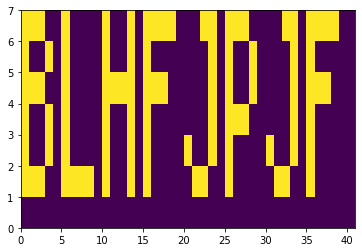

In [86]:
plt.pcolormesh(new[:,::-1].T>0)

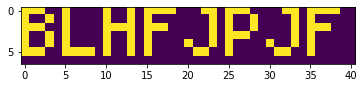

In [90]:
plt.imshow(new.T>0)

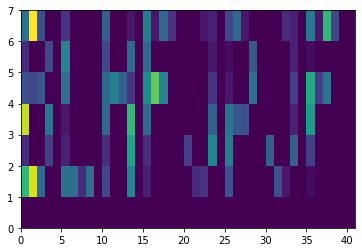

In [87]:
plt.pcolormesh(new[:,::-1].T)

In [64]:
new.shape

(656, 448)

In [65]:
327*2

654

In [62]:
num

328

In [63]:
x

327

In [58]:
num

447

In [59]:
y

447

In [52]:
new.shape

(656, 895)

In [53]:
895//447

2

In [54]:

447*2

894